In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [232]:
# Use the iris database to answer the following quesitons:
# 1. What does the distribution of petal lengths look like?

iris = sns.load_dataset('iris')
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


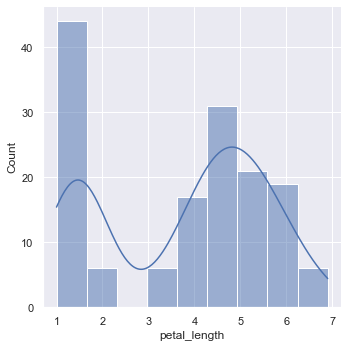

In [235]:
sns.displot(iris.petal_length, kde = True)

In [ ]:
# 2. Is there a correlation between petal length and petal width?

# Yes, postivive correlation

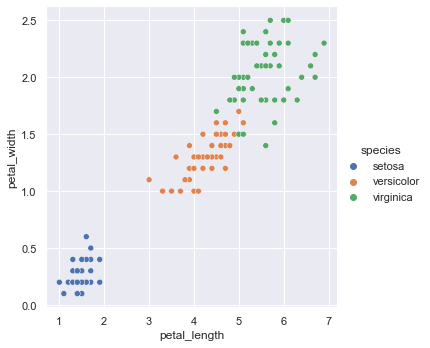

In [240]:
sns.relplot(x='petal_length',y='petal_width', data = iris, hue = 'species')

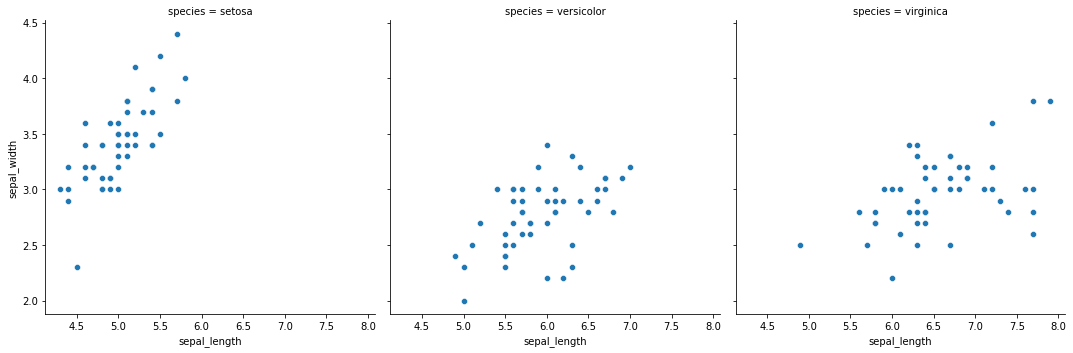

In [11]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
# For this, you'll visualize two numeric columns through the lense of a categorical column.

sns.relplot(x = 'sepal_length', y = 'sepal_width', col = 'species', data = iris)

# No

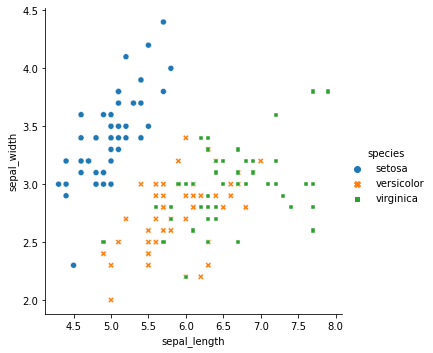

In [14]:
# 4. Which features would be best used to predict species?

sns.relplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', style = 'species', data = iris)

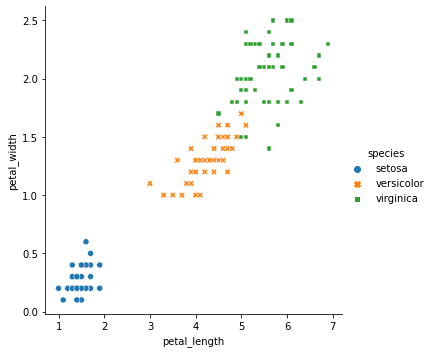

In [44]:
sns.relplot(x = 'petal_length', y = 'petal_width', hue = 'species', style = 'species', data = iris)

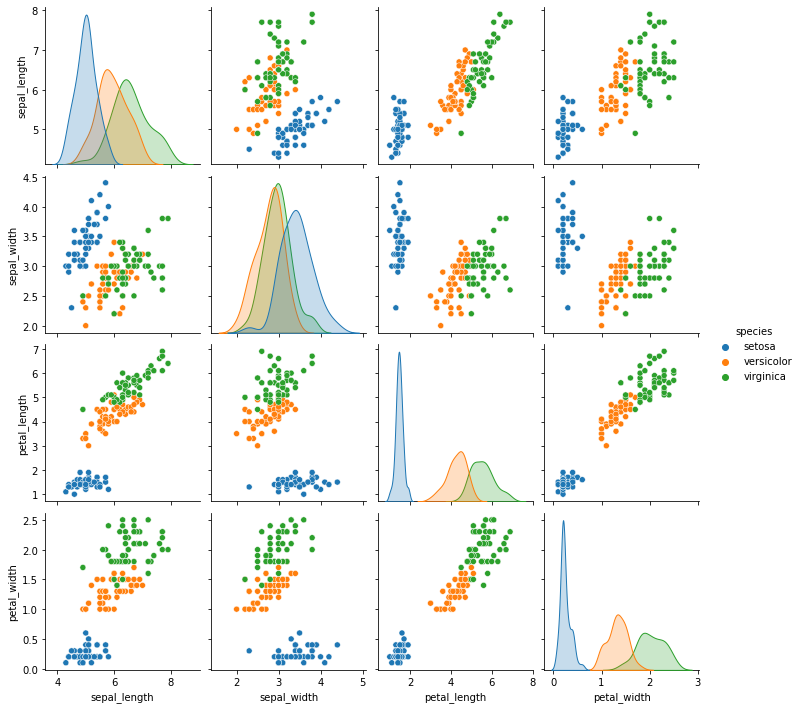

In [217]:
sns.pairplot(iris, hue='species')

In [ ]:
# Petal width are the best to use to predict species

-------------------------------------------------------------------------

In [17]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
# What do you notice?

ac = sns.load_dataset('anscombe')
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [19]:
ac.groupby('dataset').agg(['min', 'max', 'mean'])

# the first 3 datasets have the same x-min, max, mean.
# all datasets have the same mean

x                y                 
         min   max mean   min    max      mean
dataset                                       
I        4.0  14.0  9.0  4.26  10.84  7.500909
II       4.0  14.0  9.0  3.10   9.26  7.500909
III      4.0  14.0  9.0  5.39  12.74  7.500000
IV       8.0  19.0  9.0  5.25  12.50  7.500909

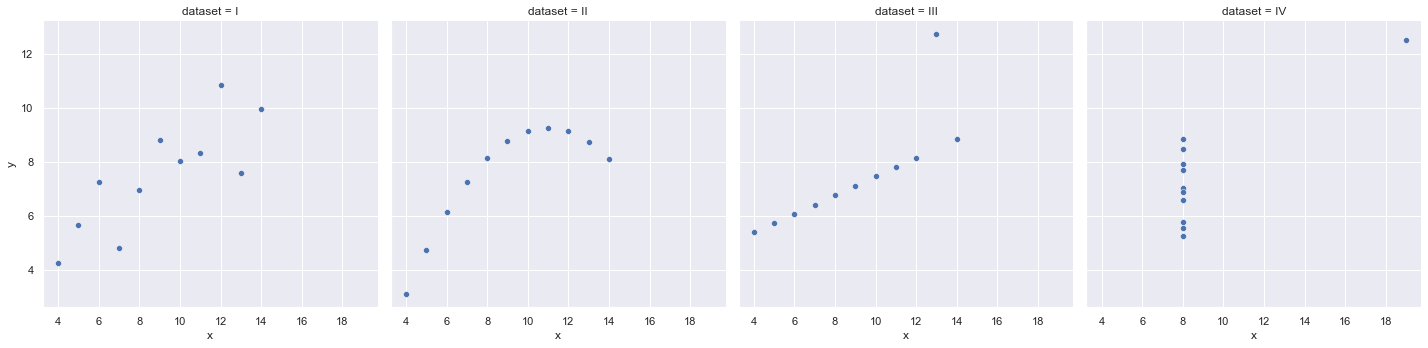

In [243]:
sns.relplot(data = ac, x = 'x', y = 'y', col = 'dataset')

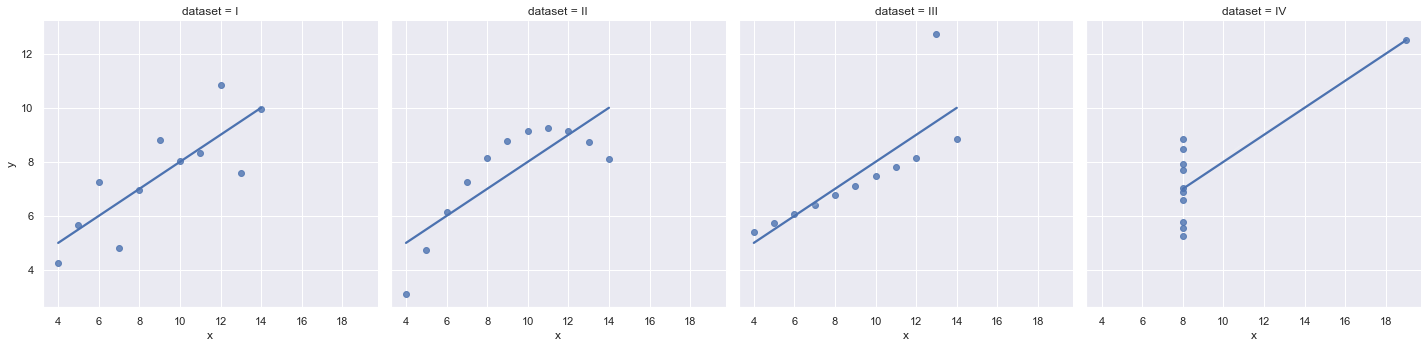

In [244]:
# checking outliers
# CAUTION: dataset IV
sns.lmplot(data = ac, x = 'x', y = 'y', col = 'dataset', ci = 0)

In [246]:
# 2. Load the InsectSprays dataset and read it's documentation.
# Create a boxplot that shows the effectiveness of the different insect sprays.

from pydataset import data

insect = data('InsectSprays')
insect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [250]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [38]:
insect.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


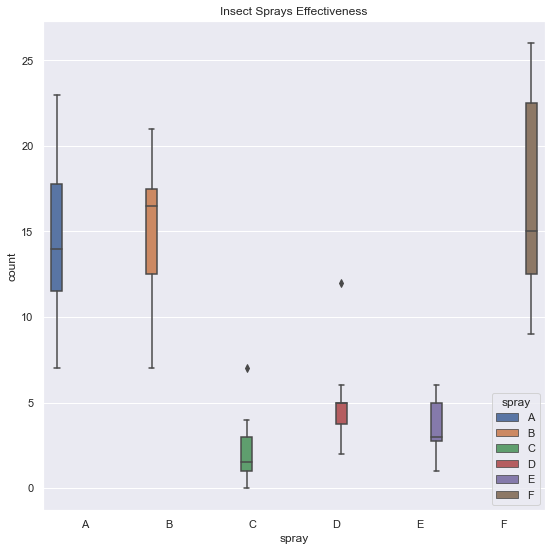

In [256]:
plt.figure(figsize = (9, 9))

sns.boxplot(data=insect, x = 'spray', y = 'count', hue = 'spray')
plt.title('Insect Sprays Effectiveness')
plt.show()

In [259]:
# 3. Load the swiss dataset and read it's documentation.
# The swiss dataset is available from pydatset rather than seaborn.
# Create visualizations to answer the following questions:

swiss = data('swiss')
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [66]:
## Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic.
## (Choose a cutoff point for what constitutes catholic)

swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [70]:
swiss['Catholic'].agg(['mean','min','max'])

mean     41.14383
min       2.15000
max     100.00000
Name: Catholic, dtype: float64

In [71]:
swiss['is_catholic'] = (swiss['Catholic'] >= swiss['Catholic'].agg('mean'))

In [72]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

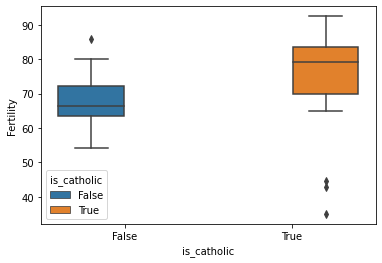

In [78]:
## Does whether or not a province is Catholic influence fertility?

sns.boxplot(x = 'is_catholic', y = 'Fertility', hue = 'is_catholic', data = swiss)

# Yes. People who are catholic have a higher fertility rate.

In [95]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.275720
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.311188
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.479546
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,0.038304
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.953898
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.135285
is_catholic,0.275720,0.311188,-0.479546,0.038304,0.953898,0.135285,1.000000


In [97]:
correlates = swiss.corr().iloc[0,:]

<AxesSubplot:>

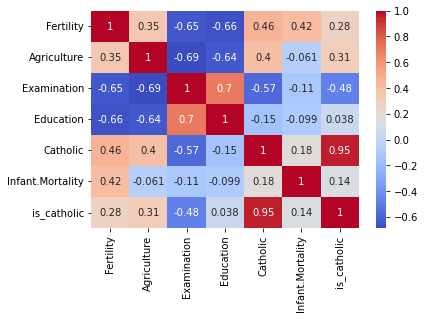

In [98]:
## What measure correlates most strongly with fertility?

correlates = swiss.corr()
sns.heatmap(correlates, annot=True, cmap = 'coolwarm')

# Negative correlation: Education
# Postive correlation: Catholic 

In [99]:
# 4. Using the chipotle dataset from the previous exercise,
# create a bar chart that shows the 4 most popular items and the revenue produced by each.

from env import host, user, password
get_db_url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [100]:
query = '''
SELECT *
FROM orders
'''
chipo = pd.read_sql(query, get_db_url)
chipo

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [ ]:
changetype = lambda x: float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(changetype) 

In [264]:
# by quantity

best_sellers = chipo.groupby('item_name').quantity.sum().nlargest(4)
best_sellers.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [265]:
chipo.item_name.isin(best_sellers.index)

0       False
1       False
2       False
3       False
4        True
        ...  
4617     True
4618     True
4619    False
4620    False
4621    False
Name: item_name, Length: 4622, dtype: bool

In [266]:
chipo[chipo.item_name.isin(best_sellers.index)]

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
10,11,5,1,Chips and Guacamole,nan,4.45
...,...,...,...,...,...,...
4607,4608,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, Sour Cream, Guacamole]]",11.75
4610,4611,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4616,4617,1832,1,Chips and Guacamole,nan,4.45
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75


In [275]:
rev = chipo[chipo.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum().reset_index()
rev

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


<AxesSubplot:xlabel='item_name', ylabel='item_price'>

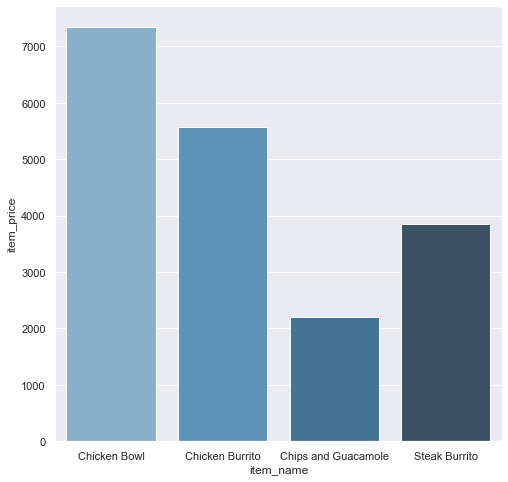

In [276]:
sns.barplot(x='item_name', y = 'item_price', data = rev, palette = 'Blues_d')

In [171]:
# by revenue

popular = chipo.groupby('item_name').sum()['item_price'].sort_values(ascending = False).head(4).reset_index()
popular.head()

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19


<AxesSubplot:xlabel='item_name', ylabel='item_price'>

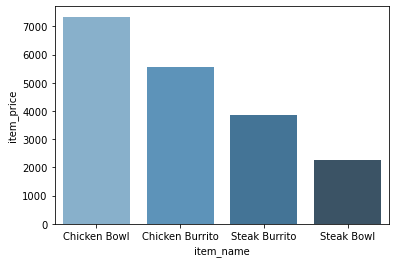

In [173]:
sns.barplot(x='item_name', y = 'item_price', data = popular, palette = 'Blues_d')

In [ ]:
# 5. Load the sleepstudy data and read it's documentation.
# Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [179]:
sleep = data('sleepstudy')
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

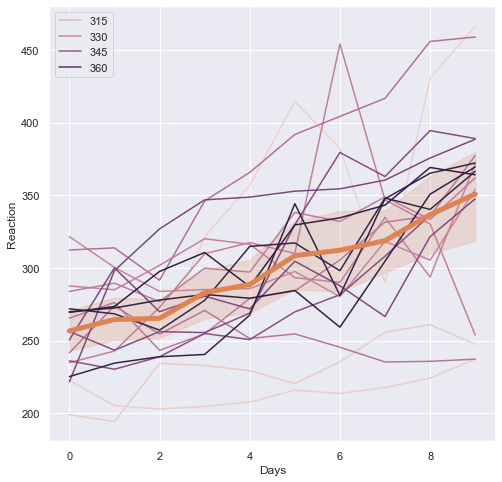

In [230]:
sns.set(rc = {'figure.figsize':(8, 8)})
sns.lineplot(data = sleep, x='Days', y='Reaction',hue = 'Subject')
sns.lineplot(data = sleep, x = 'Days', y='Reaction', lw = 5)